In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from LogisticRegression import LogisticRegression, LogisticRegressionSklearn
from MultilayerPerceptron import MultilayerPerceptron
from plot_confusion_matrix import plot_confusion_matrix
from DecisionTree import DecisionTree
from preprocessing import *
metrics = DecisionTree()
import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df = replace_zeros_with_median_considering_outcome(df, columns_to_fill=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'])
df.info()

# Train Test Split

In [5]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=41)

# Custom Logistic Regression Model

In [6]:
LR_Model = LogisticRegression(learning_rate=0.0001, num_iterations=1000)
LR_Model.fit(X_train, y_train)
y_pred_lr = LR_Model.predict(X_test)

logistic_regression_confusuion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion matrix: \n{logistic_regression_confusuion_matrix}")
accuracy, precision, recall, f1 = metrics.metrics(logistic_regression_confusuion_matrix)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Confusion matrix: 
[[22 33]
 [15 84]]
Accuracy: 0.6883116883116883
Precision: 0.5945945945945946
Recall: 0.4
F1: 0.4782608695652174


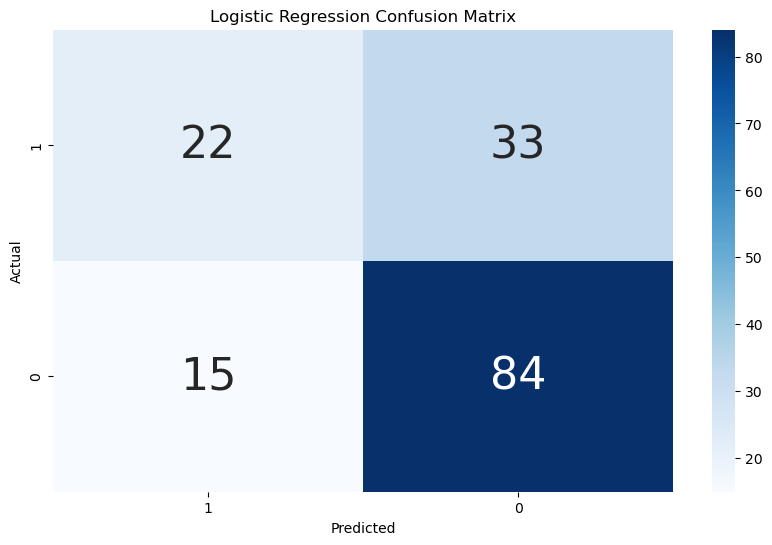

In [7]:
plot_confusion_matrix(logistic_regression_confusuion_matrix, title='Logistic Regression Confusion Matrix')

# Sklearn Logistic Regression Model

In [8]:
LR_Sklearn_Model = LogisticRegressionSklearn()
LR_Sklearn_Model.fit(X_train, y_train)
y_pred_lr = LR_Sklearn_Model.predict(X_test)

logistic_regression_sklearn_confusuion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion matrix: \n{logistic_regression_sklearn_confusuion_matrix}")
accuracy, precision, recall, f1 = metrics.metrics(logistic_regression_sklearn_confusuion_matrix)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Confusion matrix: 
[[34 21]
 [13 86]]
Accuracy: 0.7792207792207793
Precision: 0.723404255319149
Recall: 0.6181818181818182
F1: 0.6666666666666667


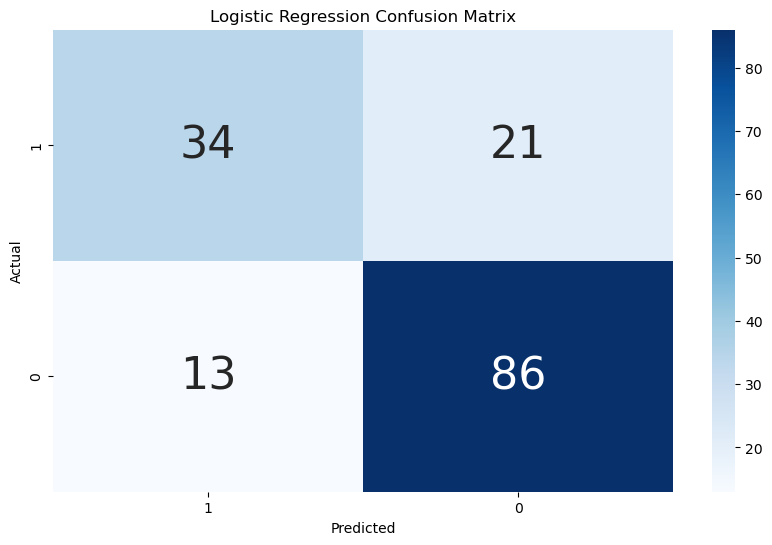

In [9]:
plot_confusion_matrix(logistic_regression_sklearn_confusuion_matrix, title='Sklearn Logistic Regression Confusion Matrix')

# Multilayer Perceptron Model

In [10]:
X_train_tensor = torch.from_numpy(X_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train).long()
y_test_tensor = torch.from_numpy(y_test).long()

Epoch 0, Training Loss: 4.0039496421813965 - Training Accuracy: 0.33876222372055054
Epoch 100, Training Loss: 0.5651412010192871 - Training Accuracy: 0.7035830616950989
Epoch 200, Training Loss: 0.3923007845878601 - Training Accuracy: 0.8420195579528809
Epoch 300, Training Loss: 0.38872960209846497 - Training Accuracy: 0.8387622237205505
Epoch 400, Training Loss: 0.35670506954193115 - Training Accuracy: 0.8485342264175415
Epoch 500, Training Loss: 0.34010592103004456 - Training Accuracy: 0.8501628637313843
Epoch 600, Training Loss: 0.3372727334499359 - Training Accuracy: 0.8566775321960449
Epoch 700, Training Loss: 0.347584068775177 - Training Accuracy: 0.8664495348930359
Epoch 800, Training Loss: 0.3104477524757385 - Training Accuracy: 0.871335506439209
Epoch 900, Training Loss: 0.3059690594673157 - Training Accuracy: 0.8648208379745483


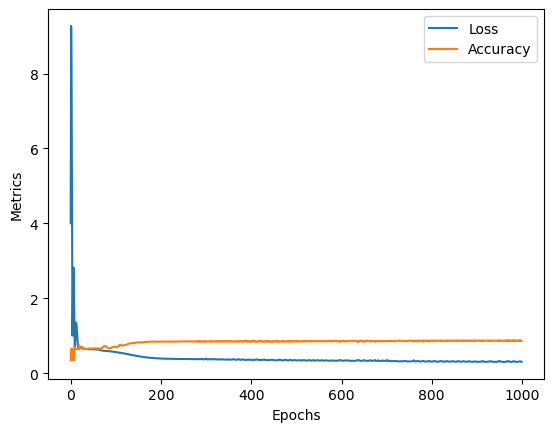

In [34]:
mlp = MultilayerPerceptron(input_size=X_train_tensor.shape[1], 
                           hidden_size=X_train_tensor.shape[1]*2, 
                           output_size=2, 
                           learning_rate=0.03,
                           activation="relu",
                           optimizer="adam",)
mlp.fit(X_train_tensor, y_train_tensor, epochs=1000)

In [35]:
y_pred_mlp = mlp.predict(X_test_tensor)
y_pred_mlp = torch.argmax(y_pred_mlp, dim=1)

mlp_confusion_matrix = metrics.confusion_matrix(y_test_tensor, y_pred_mlp)
print(f"Confusion matrix: \n{mlp_confusion_matrix}")
accuracy, precision, recall, f1 = metrics.metrics(mlp_confusion_matrix)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Confusion matrix: 
[[48  7]
 [13 86]]
Accuracy: 0.8701298701298701
Precision: 0.7868852459016393
Recall: 0.8727272727272727
F1: 0.8275862068965518


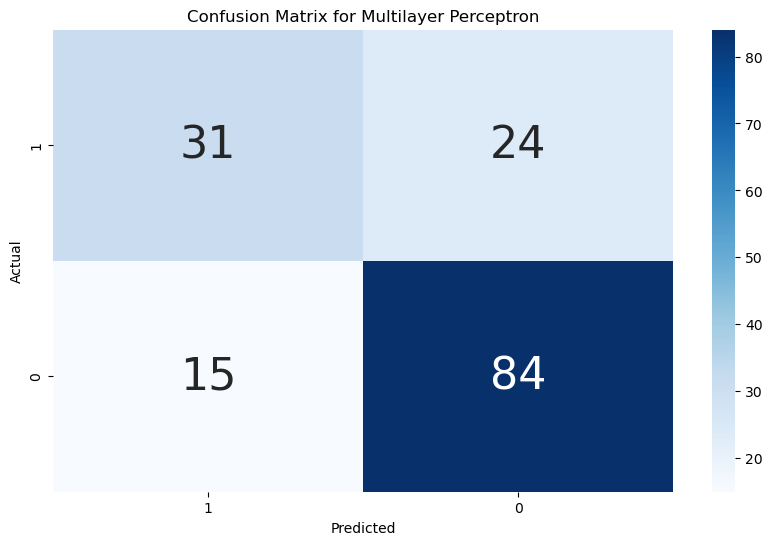

In [13]:
plot_confusion_matrix(mlp_confusion_matrix, "Confusion Matrix for Multilayer Perceptron")